In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('E:/DS/kc_house.csv')
print(data)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [3]:
data.shape

(21613, 21)

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

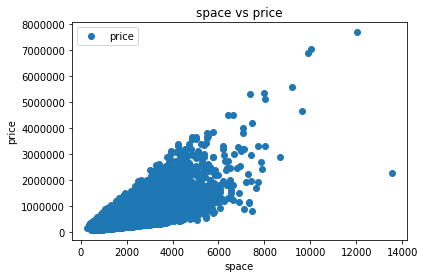

In [6]:
data.plot(x='sqft_living', y='price', style='o')  
plt.title('space vs price')  
plt.xlabel('space')  
plt.ylabel('price')  
plt.show()

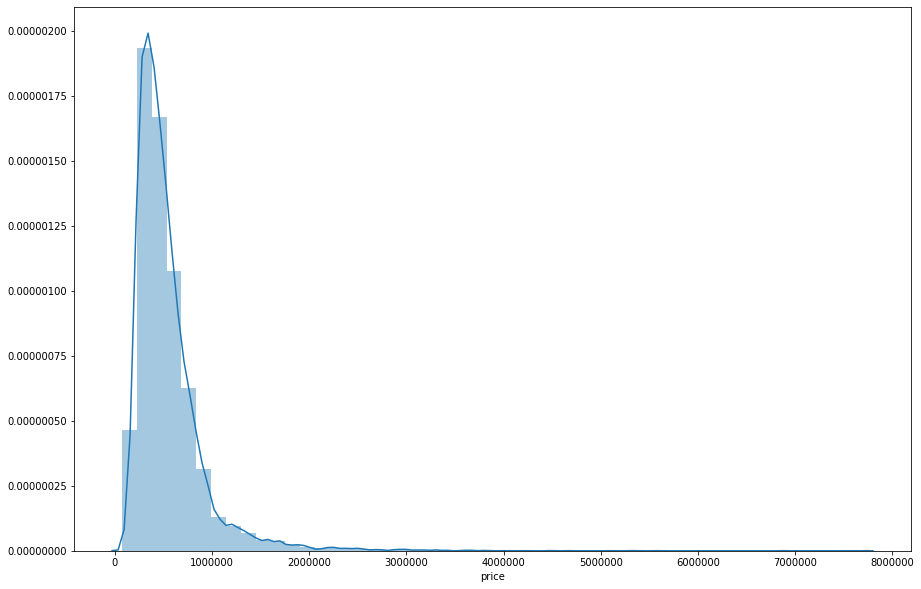

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['price'])

# Average price of the houses range around 7000000-8000000

In [8]:
X = data['sqft_living'].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)

In [9]:
#time to train the set with 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-48257.06359103]
[[283.96855716]]


In [12]:
#This means that for every one unit of change in space, the change in the price is about 0.00

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,297000.0,3.578180e+05
1,1578000.0,1.277876e+06
2,562100.0,3.606577e+05
3,631500.0,2.726274e+05
4,780000.0,8.547629e+05
...,...,...
4318,844000.0,8.292058e+05
4319,335500.0,3.095433e+05
4320,369950.0,3.379402e+05
4321,300000.0,2.215131e+05


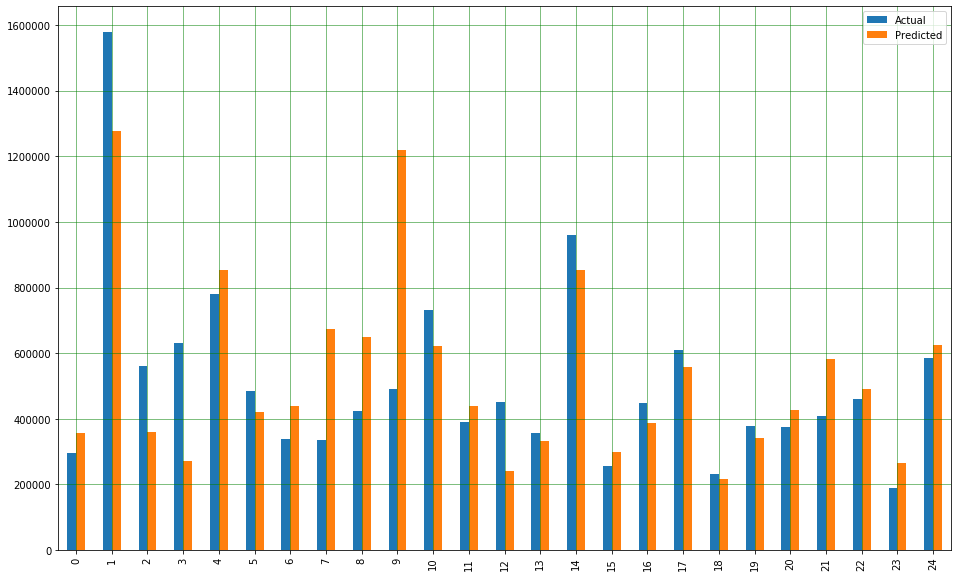

In [15]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

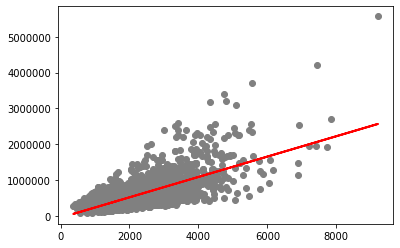

In [16]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(regressor.score(X_train,y_train),3))
print('R sqaured testing',round(regressor.score(X_test,y_test),3) )

Mean Absolute Error: 170780.92628145576
Mean Squared Error: 61940787124.62474
Root Mean Squared Error: 248879.06124185043
Sqaured mean error 248879.06
R squared training 0.496
R sqaured testing 0.479


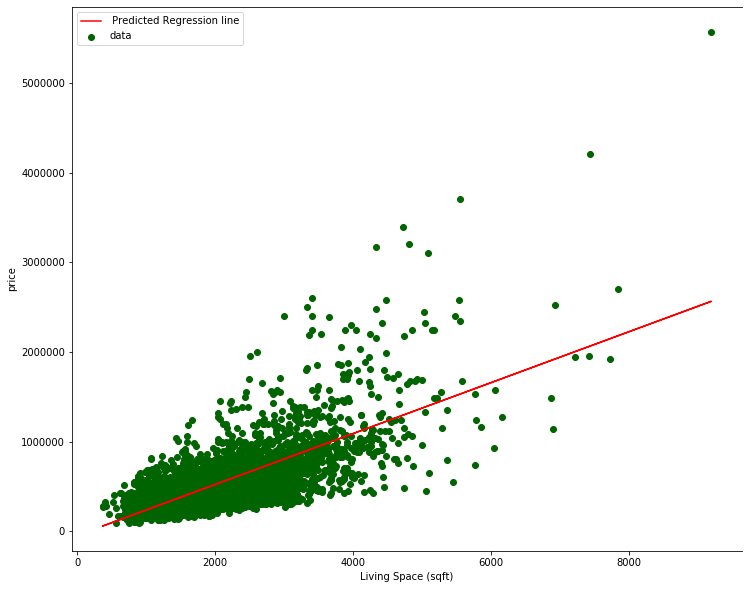

In [18]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(X_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(X_test, regressor.predict(X_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Multiple Linear Regression

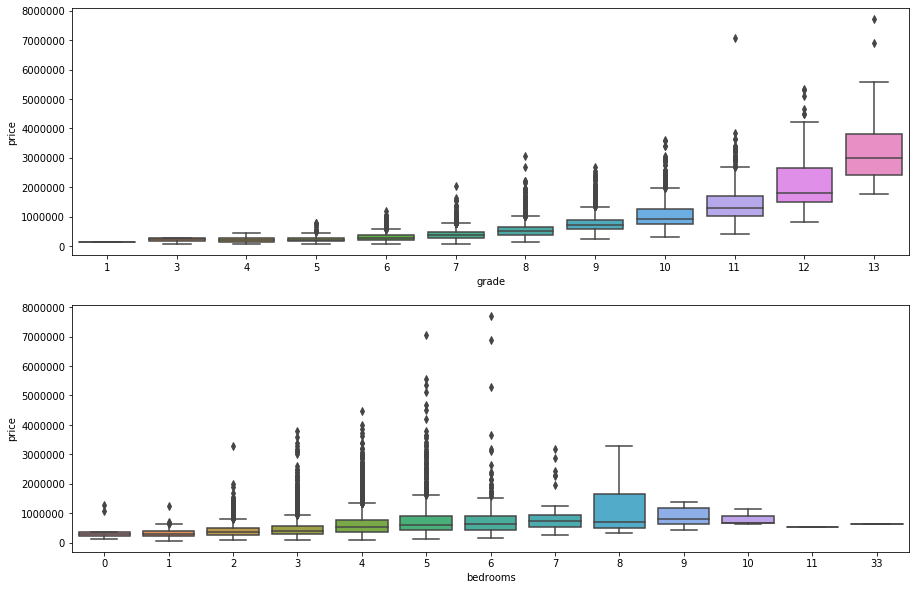

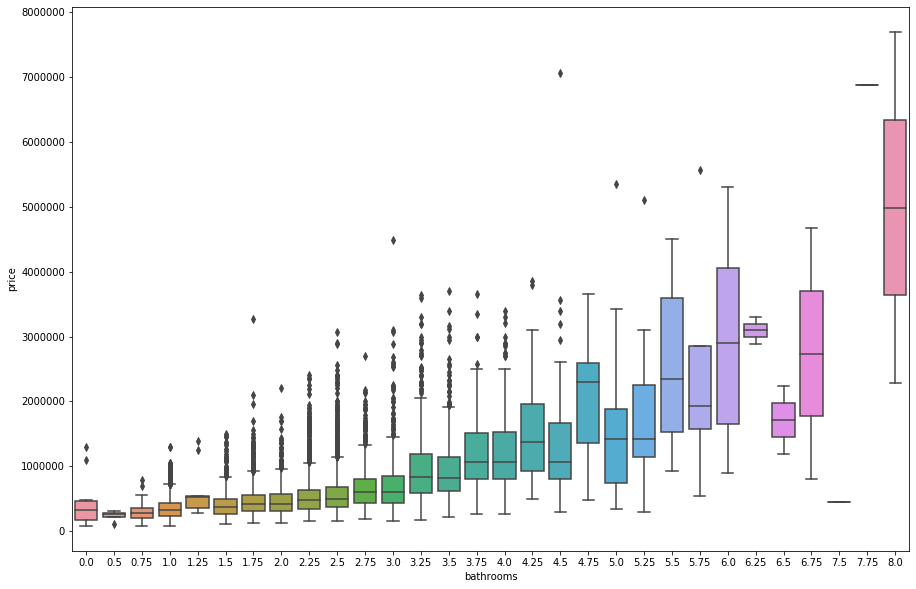

In [24]:
#The boxplot is plotted for ‘grade’, ‘bedrooms’ and ‘bathrooms’ with respective to ‘price’.
import seaborn as sns #f
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=data['grade'],y=data['price'],ax=ax[0])
sns.boxplot(x=data['bedrooms'],y=data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=data['bathrooms'],y=data['price'])

# The features we are considering are ‘bedrooms’, ‘grade’, ‘sqft_living’ and ‘sqft_above’. These are considered are one feature namely features1. Now the data is fitted into the model and test_data of features1 are used for prediction. Mean squared error is calculated for y_test. The mean squared error is rounded of upto 2 decimals. R squared error for both training and test is calculated. The intercept of the line is calculated along with coefficient of individual feature.

In [30]:
features1=['bedrooms','grade','sqft_living','sqft_above']
X = data[features1].values.reshape(-1,1)
y = data['price'].values.reshape(-1,1)
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(train_data[features1],train_data['price'])
pred=regressor.predict(test_data[features1])

In [32]:
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(regressor.score(train_data[features1],train_data['price']),3))
print('R squared training', round(regressor.score(test_data[features1],test_data['price']),3))
print('Intercept: ', regressor.intercept_)
print('Coefficient:', regressor.coef_)

mean squared error(MSE) 442550.35
R squared training 0.548
R squared training 0.555
Intercept:  -523645.7841467742
Coefficient: [-4.33050242e+04  1.03455986e+05  2.73023590e+02 -8.38875593e+01]


In [35]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
regressor = LinearRegression()  
regressor.fit(train_data[features2],train_data['price'])
pred=regressor.predict(test_data[features2])
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(regressor.score(train_data[features2], train_data['price']), 3))
print('R-squared (testing) ', round(regressor.score(test_data[features2], test_data['price']), 3))
print('Intercept: ', regressor.intercept_)
print('Coefficient:', regressor.coef_)

Mean Squared Error (MSE)  456775.65
R-squared (training)  0.655
R-squared (testing)  0.672
Intercept:  -32330182.91167583
Coefficient: [-2.62100082e+04 -3.47626774e+03  1.32069090e+02 -1.31506101e-01
 -3.22608866e+04  5.65731080e+05  6.81843494e+04  8.17559446e+04
  6.62246805e+01  6.58444098e+01  6.71765072e+05  4.60648979e+00]


# Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).For degree=2, the linear modelis built. The mean squared error is calculated and r squared is found for training and testing.

In [42]:
from sklearn.preprocessing import PolynomialFeatures
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(test_data['price'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Complex Model_3
Mean Squared Error (MSE)  221965.07
R-squared (training)  0.614
R-squared (testing)  0.616


In [41]:
#with degree 2
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])
poly= LinearRegression() 
poly.fit(xtrain_poly,train_data['price'])
polypred=poly.predict(xtest_poly)

print('complex model_4')
mean_squared_error=metrics.mean_squared_error(test_data['price'],polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

complex model_4
Mean Squared Error (MSE)  226056.91
R-squared (training)  0.627
R-squared (testing)  0.602
